<a href="https://colab.research.google.com/github/nickteim/Reinforcement_Learning-/blob/main/VideoTransform_MiDaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [1]:
import os
import glob
import time
from PIL import Image
import numpy as np
import PIL
import random
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [2]:
import os
import glob
import time
from PIL import Image
import numpy as np
import PIL
import random
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.utils as utils
import torchvision.utils as vutils    
import torchvision.models as models
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt
from PIL import Image
from skimage import io


# Download video from YouTube

In [3]:
# !pip install pytube3

In [4]:
!pip install git+https://github.com/nficano/pytube

  Cloning https://github.com/nficano/pytube to /tmp/pip-req-build-mdnmu4_x
  Running command git clone -q https://github.com/nficano/pytube /tmp/pip-req-build-mdnmu4_x
  Created wheel for pytube: filename=pytube-9.7.1-cp36-none-any.whl size=40437 sha256=ad52013050389e62cfc3dbb63f12b0298e60af8acc9f640bf10a2f92e21bf2ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-zzgloukw/wheels/44/da/40/3b5e03abe33a91895343814fb44b309512375408f4a909555b
Successfully built pytube


In [5]:
from pytube import YouTube
from moviepy.editor import *
 
# download a file from youtube
youtube_link = 'https://www.youtube.com/watch?v=92U11ya1xuQ'
w = YouTube(youtube_link).streams.first()
w.download(output_path="/content/")

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)4055040/45929032 bytes (8.8%)8290304/45929032 bytes (18.1%)12279808/45929032 bytes (26.7%)16121856/45929032 bytes (35.1%)20217856/45929032 bytes (44.0%)23896064/45929032 bytes (52.0%)27852800/45929032 bytes (60.6%)31801344/45929032 bytes (69.2%)35602432/45929032 bytes (77.5%)39542784/45929032 bytes (86.1%)43614208/45929032 bytes (95.0%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

'/content/28 WAYS TO PEEL AND CUT FRUITS LIKE A PRO.mp4'

In [6]:
Location_video='/content/28 WAYS TO PEEL AND CUT FRUITS LIKE A PRO.mp4'

##Proces video

###Split video to images

In [ ]:
## I just did about 6000 images
os.mkdir('/content/test_vid/')
os.mkdir('/content/test_vid/Frames/')
# converting video into frames
vidcap = cv2.VideoCapture(Location_video)
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/test_vid/Frames/%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame:%d, ',count, success)
  count += 1

In [8]:
##zero padding every image name in folder to get the right order
import shutil
import os

sourcedir = "/content/test_vid/Frames"; extensions = (".jpg", ".jpeg")
files = [(f, f[f.rfind("."):], f[:f.rfind(".")]) for f in os.listdir(sourcedir)if f.endswith(extensions)]
maxlen = len(max([f[2] for f in files], key = len))

for item in files:
    zeros = maxlen-len(item[2])
    shutil.move(sourcedir+"/"+item[0], sourcedir+"/"+str(zeros*"0")+item[0])

###Get model from github

 github model --> https://pytorch.org/hub/intelisl_midas_v2/

In [9]:
os.mkdir('/content/test_vid/new_model')

In [ ]:
#Used GPU
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS")

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

In [11]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.default_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


### Proces images

In [27]:
import time

/content/test_vid/Frames/1500.jpg
[]
/content/test_vid/Frames/1510.jpg
[0.3788910000000669]
/content/test_vid/Frames/1520.jpg
[0.6381180000000768]
/content/test_vid/Frames/1530.jpg
[0.9068689999999151]
/content/test_vid/Frames/1540.jpg
[1.2063100000000304]
/content/test_vid/Frames/1550.jpg
[1.481113999999934]
/content/test_vid/Frames/1560.jpg
[1.7373130000000856]
/content/test_vid/Frames/1570.jpg
[1.9927670000001854]
/content/test_vid/Frames/1580.jpg
[2.303831000000173]
/content/test_vid/Frames/1590.jpg
[2.559718999999859]


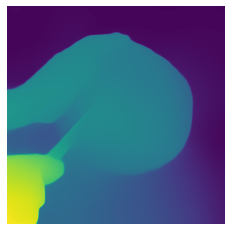

In [51]:
number=0 # each image will be named with numbers
time_array = []



path1_depth = '/content/test_vid/Frames'
data_depth = os.listdir(path1_depth)
ordedered_list = sorted(data_depth)
ordedered_list = ordedered_list[1500:]


## put image through model
for e in ordedered_list:
  start_time = time.clock()
  input = '/content/test_vid/Frames/' + e
  if number % 10 == 0:
    print(input)
    print(time_array[-1:])

  input_batch = transform(img).to(device)

  with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
  
  # saves the mathplot image
  output = prediction.cpu().numpy()
  plt.imshow(output)
  plt.axis('off')

  out = "/content/test_vid/new_model/%d.jpg" % number
  plt.savefig(out, bbox_inches='tight')
    

  # time_array = time.time() - start_time
  set_time_array = time.clock() - start_time
  time_array.append(set_time_array)
  
  number += 1



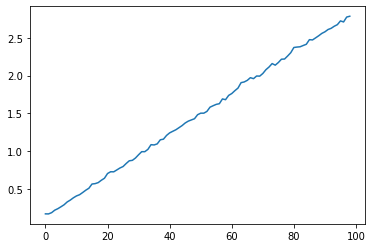

In [54]:
import matplotlib.pyplot as plt

x = [i for i in range(99)]
y = time_array
# print(y)

# plot
plt.plot(x,y)
# beautify the x-labels
# plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
##zero padding every image name in folder to get the right order
import shutil
import os

sourcedir = "/content/test_vid/new_model"; extensions = (".jpg", ".jpeg")
files = [(f, f[f.rfind("."):], f[:f.rfind(".")]) for f in os.listdir(sourcedir)if f.endswith(extensions)]
maxlen = len(max([f[2] for f in files], key = len))

for item in files:
    zeros = maxlen-len(item[2])
    shutil.move(sourcedir+"/"+item[0], sourcedir+"/"+str(zeros*"0")+item[0])

In [ ]:
assert False

##Converting it back to a video

In [ ]:
from os.path import isfile, join
 
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
 
    #for sorting the file names properly
    #files.sort(key = lambda x: int(x[5:-4]))
    files = sorted(files)
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'MP4V'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [ ]:
pathIn= '/content/test_vid/new_model/'
pathOut = '/content/video1.mp4'
#enter the correct frame rates
fps = 30
convert_frames_to_video(pathIn, pathOut, fps)

### Download video

In [ ]:
assert False

In [ ]:
#Downloading video
from google.colab import files
files.download('/content/video1.mp4') 